## Import Libraries

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import sklearn as sk
from scipy.stats.mstats import gmean

## Read the Data from file

In [2]:
# Read the file into pandas DataFrame

Data=pd.read_csv('C:\course work\career\TTI\Programming_Part1_TTI_Challenge.csv')
Data.head()

,Class PartNo X Y
0,AAA\tX135\t0.21\t1.124
1,AAA\tX126\t0.21\t1.179
2,EBHA\tX195\t0.32\t1.191
3,EBHA\tX194\t0.82\t1.249
4,AAA\tX139\t0.81\t1.255


## Data Cleaning

In [3]:
# The raw data is clubbed into single column with different columns seperated by '\t'
# Split it into seperate columns

Data[Data.columns[0].split('\t')]=pd.DataFrame(Data[str(Data.columns[0])].apply(lambda x: x.split('\t')).apply(pd.Series))
Data=Data.drop(Data.columns[0],axis=1)
Data.X=pd.to_numeric(Data.X)
Data.Y=pd.to_numeric(Data.Y)
Data.head()

,Class,PartNo,X,Y
0,AAA,X135,0.21,1.124
1,AAA,X126,0.21,1.179
2,EBHA,X195,0.32,1.191
3,EBHA,X194,0.82,1.249
4,AAA,X139,0.81,1.255


## Statistics

In [4]:
# Statistics of X and Y


stats={'Stats':['Min','Mean','Max','GMean','STD'],
    'X':[Data.X.min(),Data.X.mean(),Data.X.max(),gmean(Data.X),Data.X.std()],
    'Y':[Data.Y.min(),Data.Y.mean(),Data.Y.max(),gmean(Data.Y),Data.Y.std()]}
stats=pd.DataFrame(stats)
print(stats)

   Stats          X         Y
0    Min   0.210000  1.124000
1   Mean   5.499100  3.525130
2    Max  10.020000  7.498000
3  GMean   4.495324  3.108310
4    STD   2.672921  1.734591


## Export to SQL Server

In [5]:
# Write the dataframe into SQL Table 

import pyodbc 
from sqlalchemy import create_engine


server='VIVEKA\TTI'
DB='pandas'
connectionString = 'mssql+pyodbc://'+server+'/'+DB+'?driver=SQL Server'
engine=create_engine(connectionString)
Data.to_sql('programming',engine,if_exists='replace')

## Predictive Model

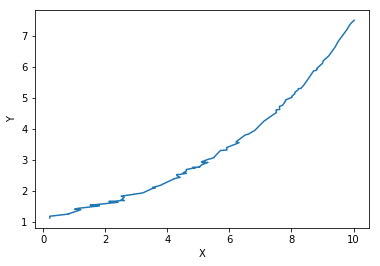

In [6]:
# visualization Y with X

plt.plot(Data.X,Data.Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Non- Linear Quadratic relation suspected between Y and X.

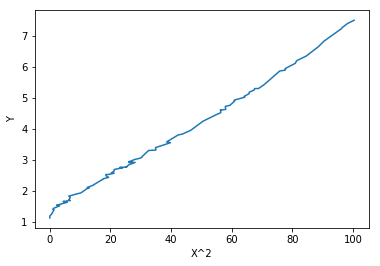

In [7]:

Data['X2']=Data.X**2
plt.plot(Data.X2,Data.Y)
plt.ylabel('Y')
plt.xlabel('X^2')
plt.show()

Shows the Quadratic relation between Y and X

### Linear Model with polynomial of X

In [8]:
#Linear model with X,X^2 as predictors

from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
model=smf.ols(formula='Y ~ X+X2', data=Data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          8.59e-130
Time:                        05:16:21   Log-Likelihood:                 109.91
No. Observations:                 100   AIC:                            -213.8
Df Residuals:                      97   BIC:                            -206.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3273      0.031     43.138      0.0

## Validation with Random splits

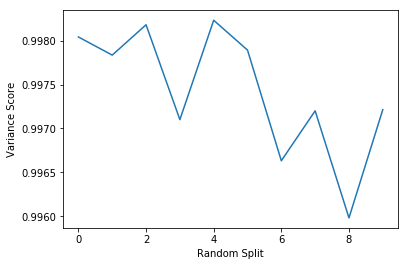

Mean Variance score: 0.997431080979


In [12]:
#Most of the variation in Y explained by X^2 as can be observed from R-squared value

# Perform random split validation for performance Metrix

from sklearn.model_selection import train_test_split
var_score=[]
for i in range(10):
    Train,Test = train_test_split(Data, test_size=0.2)
    model = smf.ols(formula='Y ~ X+X2', data=Train).fit()
    predictions=model.predict(Test)
    # Explained variance score: 1 is perfect prediction
    var_score.append(r2_score(Test.Y, predictions))

plt.plot(var_score)
plt.xlabel('Random Split')
plt.ylabel('Variance Score')
plt.show()
print('Mean Variance score:', sum(var_score)/10)

The Variance Score value is not stable with mltiple random splits.

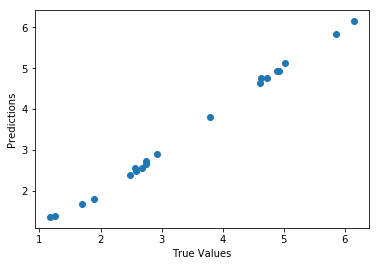

In [11]:
#Mean Variance score very close to 1 through out the iterations
plt.scatter(Test.Y,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()